In [2]:
import requests
import json
import xmltodict
r = requests.get("https://data.channelcoast.org/observations/waves/latest?key=6cefd36d8e12a4dead4cf06d4dbd09c0&sensor=Dawlish&duration=96")
decoded = r.content.decode('utf-8')
response_json = json.loads(json.dumps(xmltodict.parse(decoded)))

hold = response_json['wfs:FeatureCollection']['gml:featureMember']
waves_hs = []
waves_time = []
waves_te = []
for nn in range(0,len(hold),1):
    row_nn = hold[nn]
    hs = row_nn['ms:waves']['ms:hs'] #Wave height
    te = row_nn['ms:waves']['ms:te'] #Energy period
    time = row_nn['ms:waves']['ms:date']
    waves_hs.append(hs)
    waves_time.append(time)
    waves_te.append(te)

No handles with labels found to put in legend.


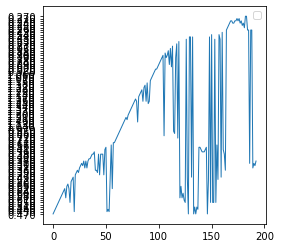

In [3]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt


fig, axs = plt.subplots(sharex=True)
#axs.plot(freq_raw,Syy_raw , linewidth = 1, label = '1d')
#axs.plot(freq_raw,hold*0.17453294 , linewidth = 1, label = '2d')
axs.plot(waves_hs, linewidth = 1)
#axs.plot(freq_raw_part,Syy_raw_part, linewidth = 1, label = 'trans')
axs.legend()
#axs.set_title(target_date)
fig.set_size_inches(4,4)

No handles with labels found to put in legend.


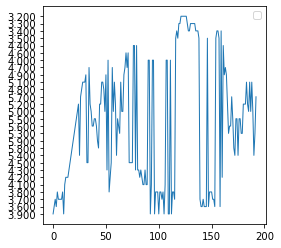

In [26]:
fig, axs = plt.subplots(sharex=True)
#axs.plot(freq_raw,Syy_raw , linewidth = 1, label = '1d')
#axs.plot(freq_raw,hold*0.17453294 , linewidth = 1, label = '2d')
axs.plot(waves_te, linewidth = 1)
#axs.plot(freq_raw_part,Syy_raw_part, linewidth = 1, label = 'trans')
axs.legend()
#axs.set_title(target_date)
fig.set_size_inches(4,4)